In [38]:
import pandas as pd
import numpy as np
import math
import mpld3
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from scipy.optimize import curve_fit
from matplotlib import dates
plt.rcParams['figure.figsize'] = [10, 5]

In [39]:
number_of_citizens=38.5

In [40]:
data = pd.read_csv("data.csv")
data_raw = data

In [41]:
dates_index = pd.date_range(start='3/4/2020', periods=len(data))

In [42]:
data['Date'] = dates_index
data = data.set_index("Date")
data['Active Cases Diff'] = data['New Cases'] - data['Deaths'] - data['Recoveries']

In [43]:
data

,No,New Cases,Tests,Deaths,Recoveries,Active Cases Diff
Date,,,,,,
2020-03-04,1,1,92.0,0,0,1
2020-03-05,2,0,179.0,0,0,0
2020-03-06,3,4,0.0,0,0,4
2020-03-07,4,1,299.0,0,0,1
2020-03-08,5,5,230.0,0,0,5
...,...,...,...,...,...,...
2020-06-17,106,455,23852.0,14,267,174
2020-06-18,107,314,26725.0,30,396,-112
2020-06-19,108,352,22723.0,18,381,-47


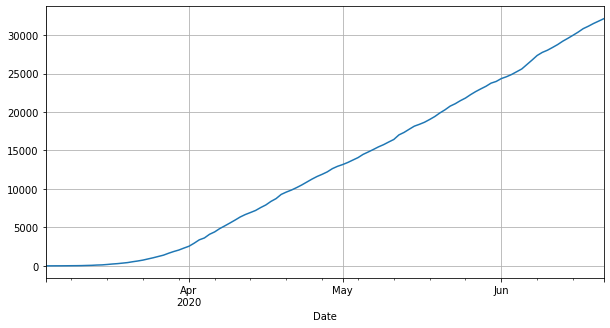

In [44]:
cases_cumsum = np.cumsum(data['New Cases'])
cases_cumsum.plot()
plt.grid(True)
plt.show()

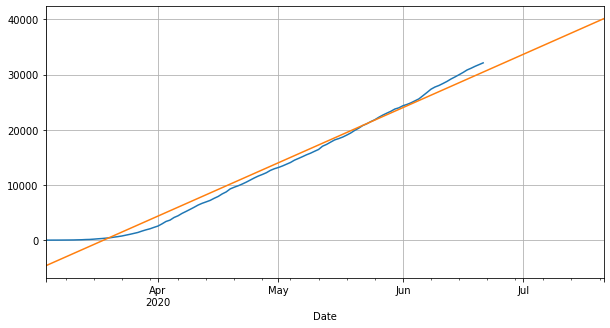

In [45]:
cases_cumsum = np.cumsum(data['New Cases'])
cases_cumsum.plot()
model = np.polyfit(range(len(data)), cases_cumsum, 1)
predicted = np.polyval(model, range(len(data)+30)).astype(int)
predicted = pd.Series(predicted, index=pd.date_range(start='3/4/2020', periods=len(predicted)))
predicted.plot()
plt.grid(True)
plt.show()

In [46]:
predicted

2020-03-04    -4661
2020-03-05    -4339
2020-03-06    -4017
2020-03-07    -3695
2020-03-08    -3372
              ...  
2020-07-17    38836
2020-07-18    39158
2020-07-19    39480
2020-07-20    39802
2020-07-21    40124
Freq: D, Length: 140, dtype: int64

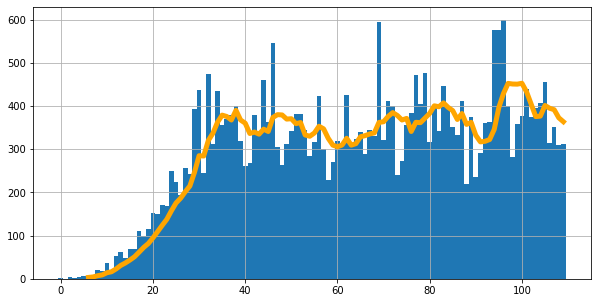

In [47]:
a = data_raw['New Cases'].rolling(7).mean()
d = data_raw['New Cases']
plt.bar(d.index, d.values,width=1)
plt.plot(a.index, a.values, color='orange', linewidth=5)
plt.grid(True)
plt.show()

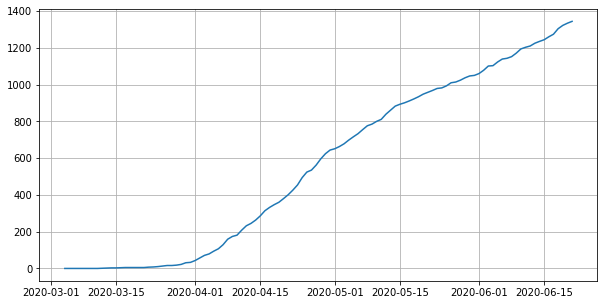

In [48]:
plt.plot(np.cumsum(data['Deaths']))
plt.grid(True)
plt.show()

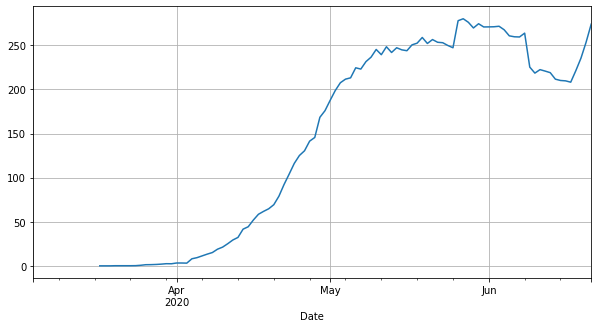

In [49]:
data['Recoveries'].rolling(14).mean().plot()
plt.grid(True)
plt.show()

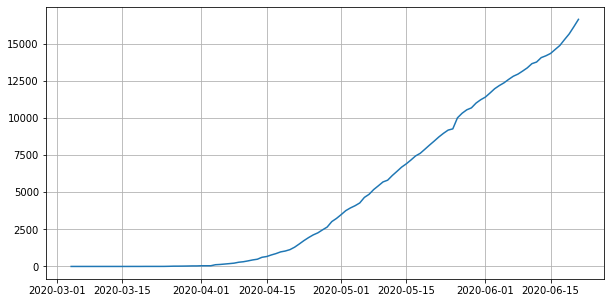

In [50]:
plt.plot(np.cumsum(data['Recoveries']))
plt.grid(True)
plt.show()

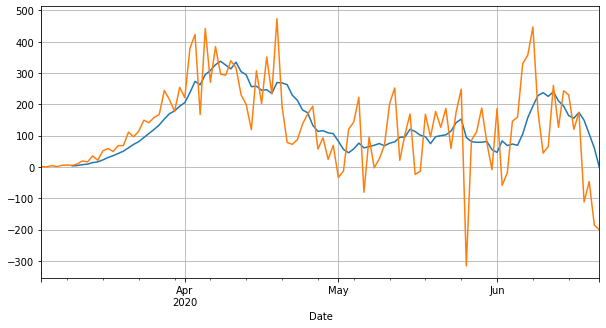

In [51]:
data['Active Cases Diff'].rolling(7).mean().plot()
data['Active Cases Diff'].rolling(1).mean().plot()
plt.grid(True)
plt.show()

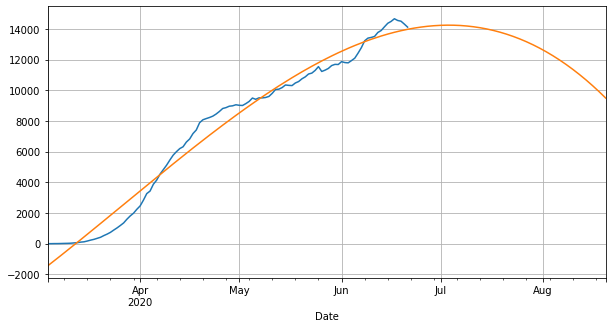

In [52]:
np.cumsum(data['Active Cases Diff']).rolling(1).mean().plot()
model = np.polyfit(range(len(data)), np.cumsum(data['Active Cases Diff']), 3)
predicted = np.polyval(model, range(len(data)+60)).astype(int)
predicted = pd.Series(predicted, index=pd.date_range(start='3/4/2020', periods=len(predicted)))
predicted.plot()
plt.grid(True)
plt.show()

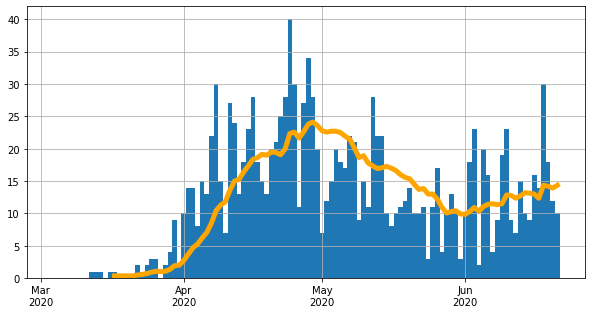

In [53]:
m = data['Deaths'].rolling(14).mean()
o = data['Deaths']
plt.bar(o.index, o.values,width=1)
plt.plot(m.index, m.values, linewidth=5,color='orange')
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
plt.grid(True)
plt.show()

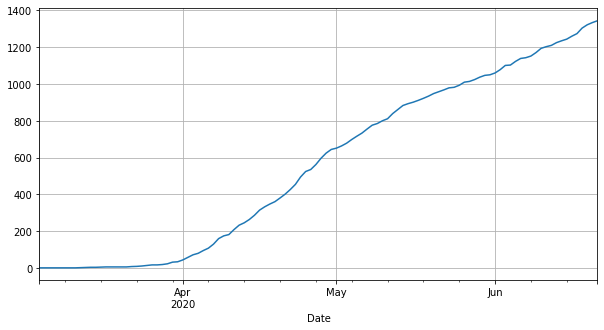

In [54]:
np.cumsum(data['Deaths']).rolling(1).mean().plot()
plt.grid(True)
plt.show()

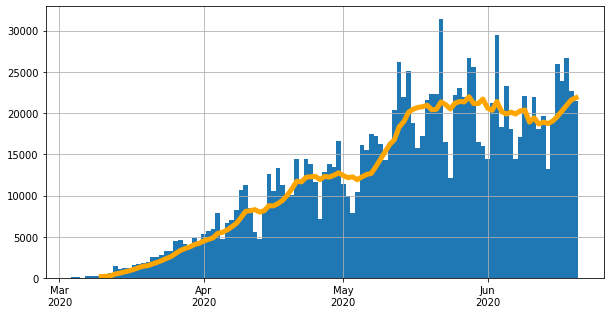

In [55]:
m = data['Tests'].rolling(7).mean()
o = data['Tests']
plt.bar(o.index, o.values,width=1)
plt.plot(m.index, m.values, linewidth=5,color='orange')
plt.gca().xaxis.set_major_locator(dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%b\n%Y"))
plt.grid(True)
plt.show()

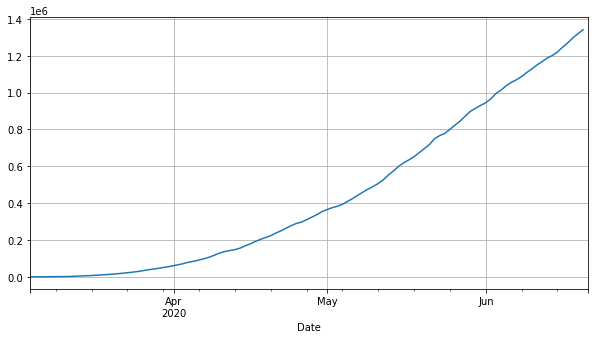

In [56]:
np.cumsum(data['Tests']).plot()
plt.grid(True)
plt.show()

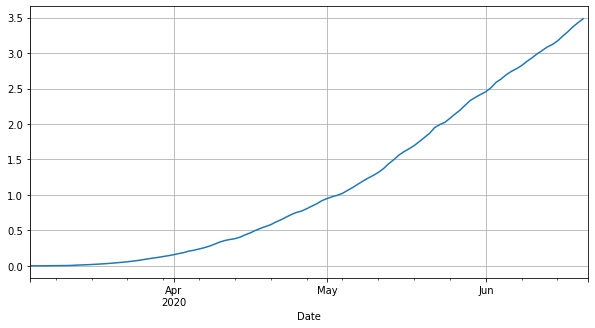

In [57]:
np.cumsum(data['Tests']).div(number_of_citizens).div(1e6).mul(100).plot()
plt.grid(True)
plt.show()

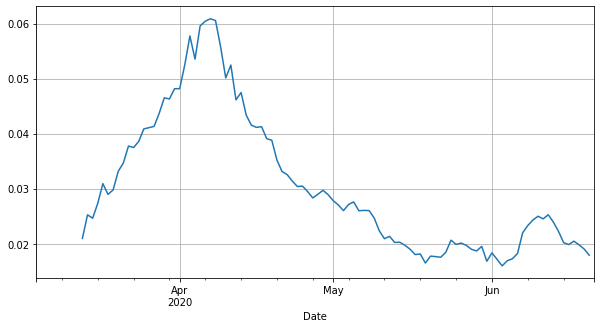

In [58]:
(data['New Cases'] / data['Tests']).rolling(window=7).mean().plot()
plt.grid(True)
plt.show()

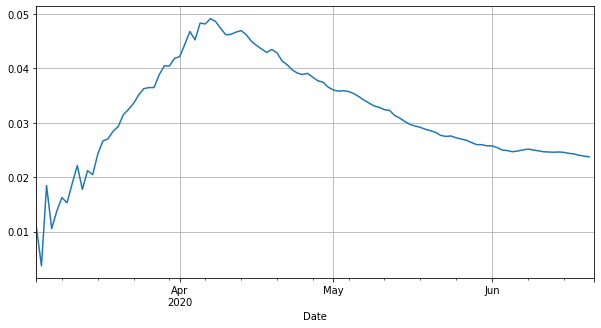

In [59]:
(np.cumsum(data['New Cases']) / np.cumsum(data['Tests'])).rolling(window=1).mean().plot()
plt.grid(True)
plt.show()

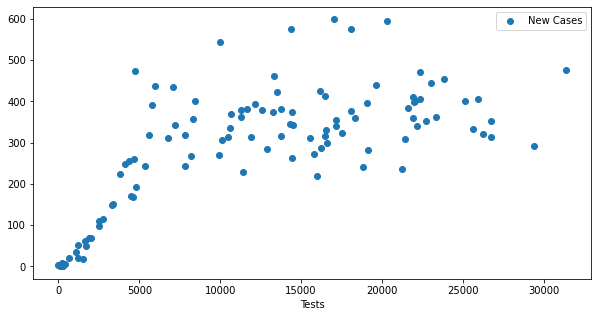

0.6890802817505088

In [60]:
data.plot(x='Tests', y='New Cases', style='o')
plt.legend(loc='best')
plt.show()
data['Tests'].corr(data['New Cases'])

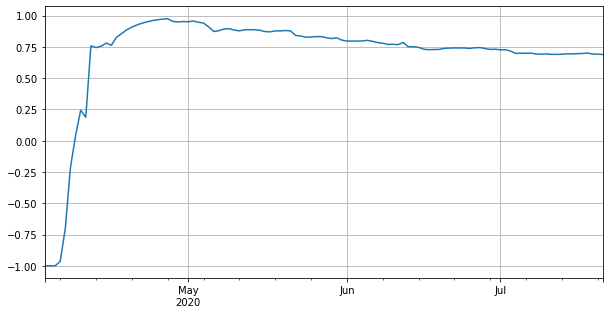

2020-04-03   -1.000000
2020-04-04   -1.000000
2020-04-05   -1.000000
2020-04-06   -0.965116
2020-04-07   -0.700998
                ...   
2020-07-17    0.696811
2020-07-18    0.700986
2020-07-19    0.692892
2020-07-20    0.691899
2020-07-21    0.689080
Freq: D, Length: 110, dtype: float64

In [61]:
def fx(x):
    if x < 2:
        x = 2
    return data['Tests'][0:x].corr(data['New Cases'][0:x])

cov_list = list(map(fx, range(0, len(data))))
si = pd.Series(cov_list, index=pd.date_range(start='4/3/2020', periods=len(cov_list)))
si.plot()
plt.grid(True)
plt.show()
si

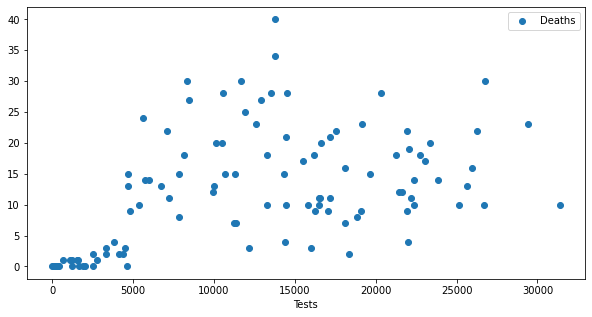

0.4793949172911403

In [62]:
data.plot(x='Tests', y='Deaths', style='o')
plt.legend(loc='best')
plt.show()
data['Tests'].corr(data['Deaths'])

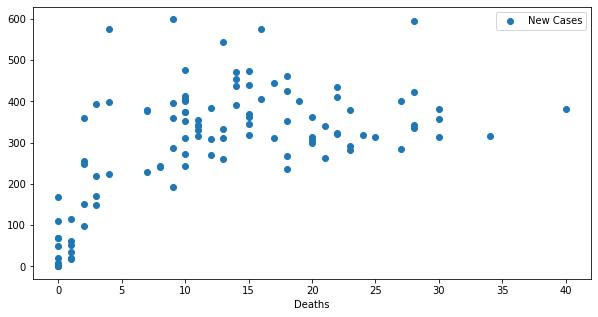

0.5892399426401732

In [63]:
data.plot(x='Deaths', y='New Cases', style='o')
plt.legend(loc='best')
plt.show()
data['New Cases'].corr(data['Deaths'])

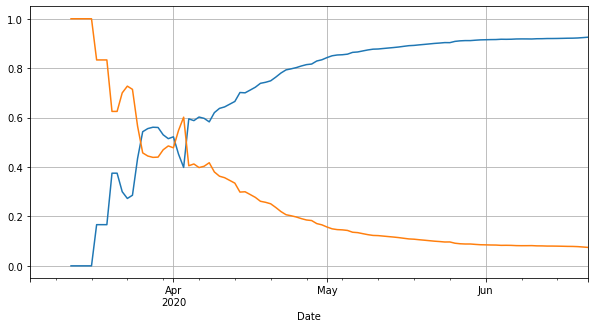

Date
2020-03-04         NaN
2020-03-05         NaN
2020-03-06         NaN
2020-03-07         NaN
2020-03-08         NaN
                ...   
2020-06-17    0.921222
2020-06-18    0.921436
2020-06-19    0.922222
2020-06-20    0.923737
2020-06-21    0.925350
Length: 110, dtype: float64

In [64]:
(np.cumsum(data['Recoveries'])/np.cumsum(data['Recoveries']+data['Deaths'])).plot()
(np.cumsum(data['Deaths'])/np.cumsum(data['Recoveries']+data['Deaths'])).plot()
plt.grid(True)
plt.show()
(np.cumsum(data['Recoveries'])/np.cumsum(data['Recoveries']+data['Deaths']))